In [47]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import matplotlib.dates as md
import matplotlib.patches as mpatches

%matplotlib inline

In [48]:
df = pd.read_csv('2019-11-07.csv')

In [49]:
df.drop(['signal'], axis=1, inplace=True)

In [50]:
# df_clean = df.dropna(subset=['condition', 'feeder'])

In [51]:
df.rename(columns={'Unnamed: 0' :'time'}, inplace=True)

In [52]:
df.index = pd.to_datetime(df['time'], dayfirst=True)

In [53]:
df.drop(['time'], axis=1, inplace=True)

In [54]:
df.head()

,bat_id_1,bat1_loc,bat_id_2,bat2_loc,pump,condition
time,,,,,,
2019-11-06 18:06:30,NaN,NaN,NaN,NaN,NaN,L reward
2019-11-06 18:06:31,NaN,NaN,NaN,NaN,NaN,L reward
2019-11-06 18:06:32,NaN,NaN,NaN,NaN,NaN,L reward
2019-11-06 18:06:33,NaN,NaN,NaN,NaN,NaN,L reward
2019-11-06 18:06:34,NaN,NaN,NaN,NaN,NaN,L reward


In [55]:
df.index[0].day

6

In [56]:
df_no_idx = df.reset_index()

In [57]:
df.shift().shape

(53979, 6)

In [58]:
df_conds = pd.concat([df_no_idx['condition'], df_no_idx['condition'].shift()], axis=1)

In [59]:
df_conds

,condition,condition
0,L reward,NaN
1,L reward,L reward
2,L reward,L reward
3,L reward,L reward
4,L reward,L reward
5,L reward,L reward
6,L reward,L reward
7,L reward,L reward
8,L reward,L reward
9,L reward,L reward


In [60]:
df_conds.columns = ['cond1', 'cond2']

In [61]:
df_conds = df_conds.fillna(method='ffill')

In [62]:
mask = df_conds['cond1'] != df_conds['cond2']

In [63]:
df_conds[mask]

,cond1,cond2
0,L reward,NaN
3601,R reward,L reward
7202,L reward,R reward
10802,R reward,L reward
14400,L reward,R reward
17995,R reward,L reward
21591,L reward,R reward
25185,R reward,L reward
28772,L reward,R reward
32355,R reward,L reward


In [64]:
idx = df_conds[df_conds['cond1'] != df_conds['cond2']].index

In [65]:
idx

Int64Index([    0,  3601,  7202, 10802, 14400, 17995, 21591, 25185, 28772,
            32355, 35923, 39438, 42953, 46454, 49955, 53452],
           dtype='int64')

In [66]:
df_no_idx.shift().loc[idx]['time']

0                       NaT
3601    2019-11-06 19:06:30
7202    2019-11-06 20:06:31
10802   2019-11-06 21:06:31
14400   2019-11-06 22:06:31
17995   2019-11-06 23:06:32
21591   2019-11-07 00:06:32
25185   2019-11-07 01:06:33
28772   2019-11-07 02:06:33
32355   2019-11-07 03:06:33
35923   2019-11-07 04:06:33
39438   2019-11-07 05:06:33
42953   2019-11-07 06:06:34
46454   2019-11-07 07:06:34
49955   2019-11-07 08:06:35
53452   2019-11-07 09:06:35
Name: time, dtype: datetime64[ns]

In [67]:
idx_list = list(idx)

In [68]:
idx_list.remove(0)

In [69]:
idx_list = [x-1 for x in idx_list]

In [70]:
idx_list_max = idx_list + [df.index.shape[0]-1]
idx_list_min = [0] + [x+1 for x in idx_list]

In [71]:
idx_list_min

[0,
 3601,
 7202,
 10802,
 14400,
 17995,
 21591,
 25185,
 28772,
 32355,
 35923,
 39438,
 42953,
 46454,
 49955,
 53452]

In [72]:
idx_list_max

[3600,
 7201,
 10801,
 14399,
 17994,
 21590,
 25184,
 28771,
 32354,
 35922,
 39437,
 42952,
 46453,
 49954,
 53451,
 53978]

In [73]:
# 
df.iloc[idx_list]

,bat_id_1,bat1_loc,bat_id_2,bat2_loc,pump,condition
time,,,,,,
2019-11-06 19:06:30,NaN,NaN,NaN,NaN,NaN,L reward
2019-11-06 20:06:31,NaN,NaN,NaN,NaN,NaN,R reward
2019-11-06 21:06:31,NaN,NaN,NaN,NaN,NaN,L reward
2019-11-06 22:06:31,NaN,NaN,NaN,NaN,NaN,R reward
2019-11-06 23:06:32,307410CD2C02D9C000000001,101.0,307410CD2C040B4000000001,102.0,NaN,L reward
2019-11-07 00:06:32,NaN,NaN,NaN,NaN,NaN,R reward
2019-11-07 01:06:33,NaN,NaN,NaN,NaN,NaN,L reward
2019-11-07 02:06:33,NaN,NaN,NaN,NaN,NaN,R reward
2019-11-07 03:06:33,NaN,NaN,NaN,NaN,NaN,L reward


In [74]:
df['condition'].unique()

array(['L reward', 'R reward', nan], dtype=object)

In [75]:
df['condition'].fillna('unknown', inplace=True)
# df.dropna(inplace=True)

In [76]:
df_min = df.iloc[idx_list_min]

In [77]:
df_max = df.iloc[idx_list_max]

In [78]:
df.index.shape

(53979,)

In [79]:
df_min.index

DatetimeIndex(['2019-11-06 18:06:30', '2019-11-06 19:06:31',
               '2019-11-06 20:06:32', '2019-11-06 21:06:32',
               '2019-11-06 22:06:32', '2019-11-06 23:06:33',
               '2019-11-07 00:06:33', '2019-11-07 01:06:34',
               '2019-11-07 02:06:34', '2019-11-07 03:06:34',
               '2019-11-07 04:06:34', '2019-11-07 05:06:34',
               '2019-11-07 06:06:35', '2019-11-07 07:06:35',
               '2019-11-07 08:06:36', '2019-11-07 09:06:36'],
              dtype='datetime64[ns]', name='time', freq=None)

In [80]:
df_max.index

DatetimeIndex(['2019-11-06 19:06:30', '2019-11-06 20:06:31',
               '2019-11-06 21:06:31', '2019-11-06 22:06:31',
               '2019-11-06 23:06:32', '2019-11-07 00:06:32',
               '2019-11-07 01:06:33', '2019-11-07 02:06:33',
               '2019-11-07 03:06:33', '2019-11-07 04:06:33',
               '2019-11-07 05:06:33', '2019-11-07 06:06:34',
               '2019-11-07 07:06:34', '2019-11-07 08:06:35',
               '2019-11-07 09:06:35', '2019-11-07 09:15:41'],
              dtype='datetime64[ns]', name='time', freq=None)

In [81]:
condition_start_end = list(zip(df_min.index, df_max.index))

In [82]:
condition_start_end

[(Timestamp('2019-11-06 18:06:30'), Timestamp('2019-11-06 19:06:30')),
 (Timestamp('2019-11-06 19:06:31'), Timestamp('2019-11-06 20:06:31')),
 (Timestamp('2019-11-06 20:06:32'), Timestamp('2019-11-06 21:06:31')),
 (Timestamp('2019-11-06 21:06:32'), Timestamp('2019-11-06 22:06:31')),
 (Timestamp('2019-11-06 22:06:32'), Timestamp('2019-11-06 23:06:32')),
 (Timestamp('2019-11-06 23:06:33'), Timestamp('2019-11-07 00:06:32')),
 (Timestamp('2019-11-07 00:06:33'), Timestamp('2019-11-07 01:06:33')),
 (Timestamp('2019-11-07 01:06:34'), Timestamp('2019-11-07 02:06:33')),
 (Timestamp('2019-11-07 02:06:34'), Timestamp('2019-11-07 03:06:33')),
 (Timestamp('2019-11-07 03:06:34'), Timestamp('2019-11-07 04:06:33')),
 (Timestamp('2019-11-07 04:06:34'), Timestamp('2019-11-07 05:06:33')),
 (Timestamp('2019-11-07 05:06:34'), Timestamp('2019-11-07 06:06:34')),
 (Timestamp('2019-11-07 06:06:35'), Timestamp('2019-11-07 07:06:34')),
 (Timestamp('2019-11-07 07:06:35'), Timestamp('2019-11-07 08:06:35')),
 (Time

In [50]:
df.head()

,bat_id_1,bat1_loc,bat_id_2,bat2_loc,pump,condition
time,,,,,,
2019-11-06 18:06:30,NaN,NaN,NaN,NaN,NaN,L reward
2019-11-06 18:06:31,NaN,NaN,NaN,NaN,NaN,L reward
2019-11-06 18:06:32,NaN,NaN,NaN,NaN,NaN,L reward
2019-11-06 18:06:33,NaN,NaN,NaN,NaN,NaN,L reward
2019-11-06 18:06:34,NaN,NaN,NaN,NaN,NaN,L reward


In [51]:
df_bat1 = df.copy()

In [52]:
df_bat1.drop(['bat_id_2','bat2_loc'], axis=1, inplace=True)

In [53]:
df_bat1.head()

,bat_id_1,bat1_loc,pump,condition
time,,,,
2019-11-06 18:06:30,NaN,NaN,NaN,L reward
2019-11-06 18:06:31,NaN,NaN,NaN,L reward
2019-11-06 18:06:32,NaN,NaN,NaN,L reward
2019-11-06 18:06:33,NaN,NaN,NaN,L reward
2019-11-06 18:06:34,NaN,NaN,NaN,L reward


In [54]:
is_f2 = df_bat1['bat1_loc'] == 102 #filter/mask

In [55]:
right_bat1 = df_bat1[is_f2]

In [56]:
right_bat1.head()

,bat_id_1,bat1_loc,pump,condition
time,,,,
2019-11-06 18:13:33,307410CD2C02D9C000000001,102.0,2,L reward
2019-11-06 18:13:34,307410CD2C02D9C000000001,102.0,NaN,L reward
2019-11-06 18:13:37,307410CD2C02D9C000000001,102.0,NaN,L reward
2019-11-06 18:13:38,307410CD2C02D9C000000001,102.0,NaN,L reward
2019-11-06 18:13:39,307410CD2C02D9C000000001,102.0,NaN,L reward


In [57]:
right_bat1 = right_bat1.dropna(subset=['pump'])

In [58]:
right_bat1.head()

,bat_id_1,bat1_loc,pump,condition
time,,,,
2019-11-06 18:13:33,307410CD2C02D9C000000001,102.0,2,L reward
2019-11-06 18:14:02,307410CD2C02D9C000000001,102.0,no 2,L reward
2019-11-06 22:45:31,307410CD2C02D9C000000001,102.0,no 2,L reward
2019-11-06 22:48:16,307410CD2C02D9C000000001,102.0,no 2,L reward
2019-11-06 23:01:26,307410CD2C02D9C000000001,102.0,no 2,L reward


In [59]:
right_bat1.to_csv("bat1_102_choices")

In [126]:
df_bat1.head()

,bat_id_1,bat1_loc,pump,condition
time,,,,
2019-11-06 18:06:30,NaN,NaN,NaN,L reward
2019-11-06 18:06:31,NaN,NaN,NaN,L reward
2019-11-06 18:06:32,NaN,NaN,NaN,L reward
2019-11-06 18:06:33,NaN,NaN,NaN,L reward
2019-11-06 18:06:34,NaN,NaN,NaN,L reward


In [61]:
df_bat1_choices = df_bat1.copy()

In [132]:
# for t in df_bat1_choices['time'].head():
df_bat1.resample('15Min').mean()

,bat1_loc
time,
2019-11-06 18:00:00,102.000000
2019-11-06 18:15:00,NaN
2019-11-06 18:30:00,NaN
2019-11-06 18:45:00,NaN
2019-11-06 19:00:00,NaN
2019-11-06 19:15:00,NaN
2019-11-06 19:30:00,NaN
2019-11-06 19:45:00,NaN
2019-11-06 20:00:00,NaN


In [62]:
df_bat1_choices = df_bat1_choices.replace(102, 2)

In [63]:
df_bat1_choices = df_bat1_choices.replace(101, 1)

In [64]:
df_bat1_choices['bat1_loc'].unique()

array([nan,  2.,  1.])

In [65]:
df_bat1_choices = df_bat1_choices.dropna(subset=['pump'])

In [66]:
df_bat1_choices = df_bat1_choices.dropna()

In [67]:
df_bat1_choices.head()

,bat_id_1,bat1_loc,pump,condition
time,,,,
2019-11-06 18:13:33,307410CD2C02D9C000000001,2.0,2,L reward
2019-11-06 18:14:02,307410CD2C02D9C000000001,2.0,no 2,L reward
2019-11-06 22:45:31,307410CD2C02D9C000000001,2.0,no 2,L reward
2019-11-06 22:48:16,307410CD2C02D9C000000001,2.0,no 2,L reward
2019-11-06 22:48:44,307410CD2C02D9C000000001,1.0,no 1,L reward


In [68]:
df_bat1_choices.to_csv("df_bat1_choices")

In [69]:
# df_bat1_choices = df_bat1_choices.groupby('bat1_loc').count()

In [70]:
# df_bat1_choices

In [71]:
# df_bat1_choices['time'] = pd.to_datetime(df_bat1_choices.index)

In [72]:
df_bat1_choices = pd.read_csv('df_bat1_choices')

In [73]:
df_bat1_choices.head()

,time,bat_id_1,bat1_loc,pump,condition
0,2019-11-06 18:13:33,307410CD2C02D9C000000001,2.0,2,L reward
1,2019-11-06 18:14:02,307410CD2C02D9C000000001,2.0,no 2,L reward
2,2019-11-06 22:45:31,307410CD2C02D9C000000001,2.0,no 2,L reward
3,2019-11-06 22:48:16,307410CD2C02D9C000000001,2.0,no 2,L reward
4,2019-11-06 22:48:44,307410CD2C02D9C000000001,1.0,no 1,L reward


In [81]:
df_bat1_choices['time'] = pd.to_datetime(df_bat1_choices['time'], dayfirst=True)

In [89]:
df_bat1_choices['moving avg'] = df_bat1_choices['bat1_loc'].rolling(window=5).mean()

In [99]:
df_bat1_choices2 = df_bat1_choices.copy()
df_bat1_choices2.index = pd.to_datetime(df_bat1_choices2['time'], dayfirst=True)

In [114]:
df_bat1_choices2['better moving avg'] = df_bat1_choices2['bat1_loc'].rolling('1h', min_periods=1).mean()
# df.rolling('2s', min_periods=1).sum()

In [138]:
# df_15 = df_bat1_choices2.resample('15Min').mean()
df.groupby(pd.Grouper(level='times', freq='H')).median() #check this

In [139]:
df_15.head()

,bat1_loc,moving avg,better moving avg
time,,,
2019-11-06 18:00:00,2.0,NaN,2.0
2019-11-06 18:15:00,NaN,NaN,NaN
2019-11-06 18:30:00,NaN,NaN,NaN
2019-11-06 18:45:00,NaN,NaN,NaN
2019-11-06 19:00:00,NaN,NaN,NaN


In [137]:
df_bat1_choices2.tail()

,time,bat_id_1,bat1_loc,pump,condition,moving avg,better moving avg
time,,,,,,,
2019-11-07 05:43:23,2019-11-07 05:43:23,307410CD2C02D9C000000001,2.0,no 2,R reward,2.0,1.892857
2019-11-07 05:45:14,2019-11-07 05:45:14,307410CD2C02D9C000000001,2.0,2,R reward,2.0,1.896552
2019-11-07 06:05:33,2019-11-07 06:05:33,307410CD2C02D9C000000001,2.0,2,R reward,2.0,1.888889
2019-11-07 06:05:49,2019-11-07 06:05:49,307410CD2C02D9C000000001,2.0,no 2,R reward,2.0,1.892857
2019-11-07 06:54:58,2019-11-07 06:54:58,307410CD2C02D9C000000001,2.0,no 2,L reward,2.0,2.000000


In [74]:
pd.plotting.register_matplotlib_converters(explicit=True)

In [75]:
for min_time,max_time in condition_start_end:
    print (min_time.month,max_time.day)

11 6
11 6
11 6
11 6
11 6
11 7
11 7
11 7
11 7
11 7
11 7
11 7
11 7
11 7
11 7
11 7


In [1]:
# # df_bat1_choices = df_bat1_choices.dropna()
fig = plt.figure(figsize=(15,15))
figtemp, ax = plt.subplots(1, 1)
plt.style.use('seaborn')
choices = plt.plot_date(df_bat1_choices['time'], df_bat1_choices['bat1_loc'], linestyle='solid')
# choices = plt.plot_date(choices_df_num['time'], choices_df_num['moving avg'])

plt.ylabel('1 = right feeder, -1 = left feeder')
# Set time format and the interval of ticks (every 15 minutes)
xformatter = md.DateFormatter('%H:%M')
xlocator = md.MinuteLocator(interval = 60)
# Set xtick labels to appear every 60 minutes
ax.xaxis.set_major_locator(xlocator)
## Format xtick labels as HH:MM
plt.gcf().axes[0].xaxis.set_major_formatter(xformatter)
# rotate_labels...
for label in ax.get_xticklabels():
    label.set_rotation(40)
    label.set_horizontalalignment('right')

cond_dict = { 'unknown': 'y', 'R reward': 'g', 'L reward': 'r'}
for min_time,max_time in condition_start_end:
    # min_time = pd.to_datetime(min_time)
    # max_time = pd.to_datetime(max_time)
    cond = df_min.loc[min_time]['condition']
    # print (cond, min_time, max_time)
    plt.axvspan(min_time,max_time, alpha=0.2, color=cond_dict[cond])
# # act_label = ax.legend(['Right feeder activity'])
# # ax = plt.gca().add_artist(act_label)
# g_patch = mpatches.Patch(color='g', label='R reward')
# r_patch = mpatches.Patch(color='r', label='L reward')
# plt.legend(handles=[g_patch,r_patch], loc='upper left')

NameError: name 'plt' is not defined

<Figure size 720x720 with 0 Axes>

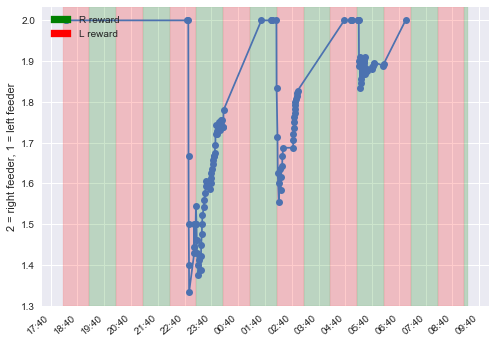

In [116]:
fig = plt.figure(figsize=(10,10))
figtemp, ax = plt.subplots(1, 1)
plt.style.use('seaborn')
choices = plt.plot_date(df_bat1_choices['time'], df_bat1_choices2['better moving avg'], linestyle='solid')
# choices = plt.plot_date(choices_df_num['time'], choices_df_num['moving avg'])

plt.ylabel('2 = right feeder, 1 = left feeder')
# Set time format and the interval of ticks (every 15 minutes)
xformatter = md.DateFormatter('%H:%M')
xlocator = md.MinuteLocator(interval = 60)
# Set xtick labels to appear every 60 minutes
ax.xaxis.set_major_locator(xlocator)
## Format xtick labels as HH:MM
plt.gcf().axes[0].xaxis.set_major_formatter(xformatter)
# rotate_labels...
for label in ax.get_xticklabels():
    label.set_rotation(40)
    label.set_horizontalalignment('right')

cond_dict = { 'unknown': 'y', 'R reward': 'g', 'L reward': 'r'}
for min_time,max_time in condition_start_end:
    # min_time = pd.to_datetime(min_time)
    # max_time = pd.to_datetime(max_time)
    cond = df_min.loc[min_time]['condition']
    # print (cond, min_time, max_time)
    plt.axvspan(min_time,max_time, alpha=0.2, color=cond_dict[cond])
# # act_label = ax.legend(['Right feeder activity'])
# ax = plt.gca().add_artist(act_label)
g_patch = mpatches.Patch(color='g', label='R reward')
r_patch = mpatches.Patch(color='r', label='L reward')
plt.legend(handles=[g_patch,r_patch], loc='upper left')

<Figure size 720x720 with 0 Axes>

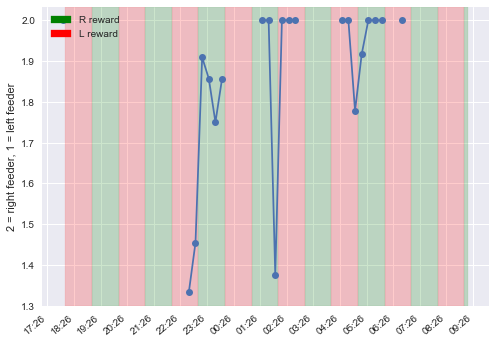

In [142]:
fig = plt.figure(figsize=(10,10))
figtemp, ax = plt.subplots(1, 1)
plt.style.use('seaborn')
choices = plt.plot_date(df_15.index, df_15['bat1_loc'], linestyle='solid')
# choices = plt.plot_date(choices_df_num['time'], choices_df_num['moving avg'])

plt.ylabel('2 = right feeder, 1 = left feeder')
# Set time format and the interval of ticks (every 15 minutes)
xformatter = md.DateFormatter('%H:%M')
xlocator = md.MinuteLocator(interval = 60)
# Set xtick labels to appear every 60 minutes
ax.xaxis.set_major_locator(xlocator)
## Format xtick labels as HH:MM
plt.gcf().axes[0].xaxis.set_major_formatter(xformatter)
# rotate_labels...
for label in ax.get_xticklabels():
    label.set_rotation(40)
    label.set_horizontalalignment('right')

cond_dict = { 'unknown': 'y', 'R reward': 'g', 'L reward': 'r'}
for min_time,max_time in condition_start_end:
    # min_time = pd.to_datetime(min_time)
    # max_time = pd.to_datetime(max_time)
    cond = df_min.loc[min_time]['condition']
    # print (cond, min_time, max_time)
    plt.axvspan(min_time,max_time, alpha=0.2, color=cond_dict[cond])
# # act_label = ax.legend(['Right feeder activity'])
# ax = plt.gca().add_artist(act_label)
g_patch = mpatches.Patch(color='g', label='R reward')
r_patch = mpatches.Patch(color='r', label='L reward')
plt.legend(handles=[g_patch,r_patch], loc='upper left')

In [84]:
# df_bat1_choices = df_bat1_choices.groupby(pd.Grouper(freq='15Min', base=8, label='right'))['bat1_loc'].value_counts(normalize=True)

ValueError: operands could not be broadcast together with shape (2846,) (63,)

In [ ]:
# activity_df = df.groupby(pd.Grouper(freq='15Min', base=8, label='right'))['feeder'].value_counts(normalize=True)

In [68]:
# is_f2 = df_bat1['bat1_loc'] == "102" #filter/mask
# is_f1 = df_bat1['bat1_loc'] == "101" #filter/mask
# right_bat1 = df_bat1[is_f2]

/Applications/anaconda3/lib/python3.7/site-packages/pandas/core/ops.py:1649: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


<Figure size 720x720 with 0 Axes>

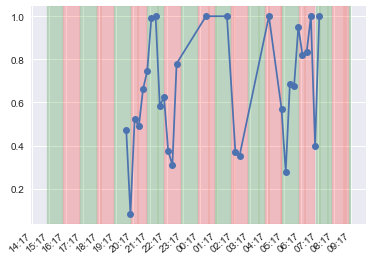

In [99]:
# pref_df = pd.read_csv("bat1_102_choices", header = None, names = ('time', 'pref'))
# pref_df = pd.read_csv("bat1_102_choices")
# pref_df['time'] = pd.to_datetime(pref_df['time'])
# fig = plt.figure(figsize=(10,10))
# figtemp, ax = plt.subplots(1, 1)
# # ax.plot(activity_df_right)
# # ax.scatter(pref_df['time'], pref_df['pref'])
# # ax = pref_df.plot.scatter(x='time',y = 'pref')
# plt.style.use('seaborn')
# plt.plot_date(pref_df['time'], pref_df['pref'], linestyle='solid')
# # pref_df.plot(x='time', y='pref', kind='scatter', ax=ax)
# # Set time format and the interval of ticks (every 15 minutes)
# xformatter = md.DateFormatter('%H:%M')
# xlocator = md.MinuteLocator(interval = 60)
# # Set xtick labels to appear every 60 minutes
# ax.xaxis.set_major_locator(xlocator)
# ## Format xtick labels as HH:MM
# plt.gcf().axes[0].xaxis.set_major_formatter(xformatter)
# # rotate_labels...
# for label in ax.get_xticklabels():
#     label.set_rotation(40)
#     label.set_horizontalalignment('right')

# cond_dict = { 'unknown': 'y', 'R reward': 'g', 'L reward': 'r'}
# for min_time,max_time in condition_start_end:
#     cond = df_min.loc[min_time]['condition']
#     plt.axvspan(min_time, max_time, alpha=0.2, color=cond_dict[cond])

In [ ]:
# activity_df_right = activity_df.xs("b'2'", level='feeder') #find only right

In [146]:
activity_df = pd.read_csv('activity_15Min')

In [147]:
activity_df.rename(columns={"feeder.1": "activity"}, inplace=True)
activity_df['time'] = pd.to_datetime(activity_df['time'])

In [148]:
activity_df.head()

,time,feeder,activity
0,2019-10-20 15:23:00,b'',89
1,2019-10-20 15:38:00,b'',88
2,2019-10-20 15:53:00,b'',90
3,2019-10-20 16:08:00,b'',89
4,2019-10-20 16:23:00,b'',90


In [121]:
is_b2 = activity_df['feeder'] == "b'2'" #filter/mask
right_sec_df = activity_df[is_b2]

In [122]:
right_sec_df.head()

,time,feeder,activity
19,2019-10-20 19:53:00,b'2',89
23,2019-10-20 20:08:00,b'2',1
24,2019-10-20 20:23:00,b'2',74
29,2019-10-20 20:38:00,b'2',66
30,2019-10-20 20:53:00,b'2',84


In [150]:
is_b1 = activity_df['feeder'] == "b'1'" #filter/mask
left_sec_df = activity_df[is_b1]

In [151]:
left_sec_df.head()

,time,feeder,activity
18,2019-10-20 19:53:00,b'1',99
22,2019-10-20 20:08:00,b'1',11
26,2019-10-20 20:23:00,b'1',67
28,2019-10-20 20:38:00,b'1',69
32,2019-10-20 20:53:00,b'1',43


<Figure size 720x720 with 0 Axes>

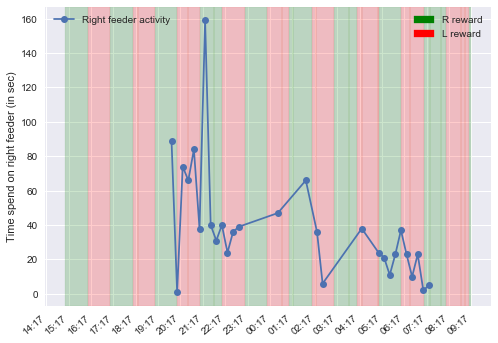

In [139]:

fig = plt.figure(figsize=(10,10))
figtemp, ax = plt.subplots(1, 1)
plt.style.use('seaborn')
right_activity = plt.plot_date(right_sec_df['time'], right_sec_df['activity'], linestyle='solid', label = 'Right feeder activity')

plt.ylabel('Time spend on right feeder (in sec)')
# Set time format and the interval of ticks (every 15 minutes)
xformatter = md.DateFormatter('%H:%M')
xlocator = md.MinuteLocator(interval = 60)
# Set xtick labels to appear every 60 minutes
ax.xaxis.set_major_locator(xlocator)
## Format xtick labels as HH:MM
plt.gcf().axes[0].xaxis.set_major_formatter(xformatter)
# rotate_labels...
for label in ax.get_xticklabels():
    label.set_rotation(40)
    label.set_horizontalalignment('right')

cond_dict = { 'unknown': 'y', 'R reward': 'g', 'L reward': 'r'}
for min_time,max_time in condition_start_end:
    cond = df_min.loc[min_time]['condition']
    plt.axvspan(min_time, max_time, alpha=0.2, color=cond_dict[cond])
act_label = ax.legend(['Right feeder activity'])
ax = plt.gca().add_artist(act_label)
g_patch = mpatches.Patch(color='g', label='R reward')
r_patch = mpatches.Patch(color='r', label='L reward')
plt.legend(handles=[g_patch,r_patch], loc='upper right')

<Figure size 720x720 with 0 Axes>

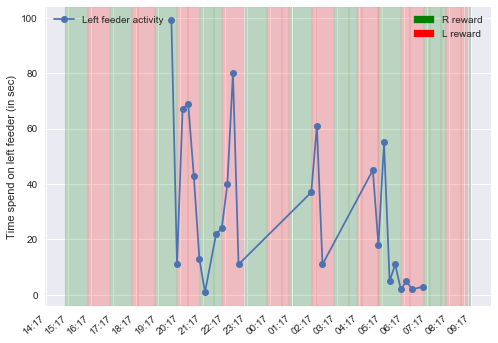

In [152]:
fig = plt.figure(figsize=(10,10))
figtemp, ax = plt.subplots(1, 1)
plt.style.use('seaborn')
left_activity = plt.plot_date(left_sec_df['time'], left_sec_df['activity'], linestyle='solid', label = 'Left feeder activity')

plt.ylabel('Time spend on left feeder (in sec)')
# Set time format and the interval of ticks (every 15 minutes)
xformatter = md.DateFormatter('%H:%M')
xlocator = md.MinuteLocator(interval = 60)
# Set xtick labels to appear every 60 minutes
ax.xaxis.set_major_locator(xlocator)
## Format xtick labels as HH:MM
plt.gcf().axes[0].xaxis.set_major_formatter(xformatter)
# rotate_labels...
for label in ax.get_xticklabels():
    label.set_rotation(40)
    label.set_horizontalalignment('right')

cond_dict = { 'unknown': 'y', 'R reward': 'g', 'L reward': 'r'}
for min_time,max_time in condition_start_end:
    cond = df_min.loc[min_time]['condition']
    plt.axvspan(min_time, max_time, alpha=0.2, color=cond_dict[cond])
act_label = ax.legend(['Left feeder activity'])
ax = plt.gca().add_artist(act_label)
g_patch = mpatches.Patch(color='g', label='R reward')
r_patch = mpatches.Patch(color='r', label='L reward')
plt.legend(handles=[g_patch,r_patch], loc='upper right')

In [143]:
activity_df = pd.read_csv('activity_10Min')
activity_df.rename(columns={"feeder.1": "activity"}, inplace=True)
activity_df['time'] = pd.to_datetime(activity_df['time'])
is_b2 = activity_df['feeder'] == "b'2'" #filter/mask
right_sec_df10 = activity_df[is_b2]
is_b1 = activity_df['feeder'] == "b'1'" #filter/mask
left_sec_df10 = activity_df[is_b1]

<Figure size 720x720 with 0 Axes>

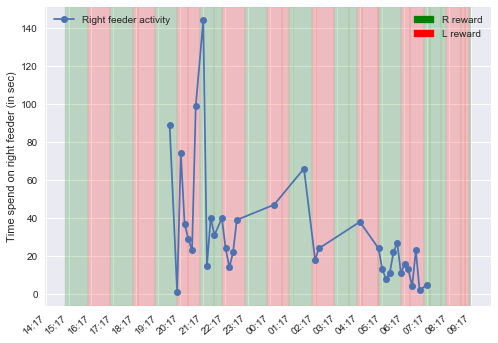

In [145]:
fig = plt.figure(figsize=(10,10))
figtemp, ax = plt.subplots(1, 1)
plt.style.use('seaborn')
right_activity = plt.plot_date(right_sec_df10['time'], right_sec_df10['activity'], linestyle='solid', label = 'Right feeder activity')

plt.ylabel('Time spend on right feeder (in sec)')
# Set time format and the interval of ticks (every 15 minutes)
xformatter = md.DateFormatter('%H:%M')
xlocator = md.MinuteLocator(interval = 60)
# Set xtick labels to appear every 60 minutes
ax.xaxis.set_major_locator(xlocator)
## Format xtick labels as HH:MM
plt.gcf().axes[0].xaxis.set_major_formatter(xformatter)
# rotate_labels...
for label in ax.get_xticklabels():
    label.set_rotation(40)
    label.set_horizontalalignment('right')

cond_dict = { 'unknown': 'y', 'R reward': 'g', 'L reward': 'r'}
for min_time,max_time in condition_start_end:
    cond = df_min.loc[min_time]['condition']
    plt.axvspan(min_time, max_time, alpha=0.2, color=cond_dict[cond])
act_label = ax.legend(['Right feeder activity'])
ax = plt.gca().add_artist(act_label)
g_patch = mpatches.Patch(color='g', label='R reward')
r_patch = mpatches.Patch(color='r', label='L reward')
plt.legend(handles=[g_patch,r_patch], loc='upper right')

In [179]:
choices_df_num = pd.read_csv('choices_df_num')
choices_df_num['time'] = pd.to_datetime(choices_df_num['time'])

<Figure size 720x720 with 0 Axes>

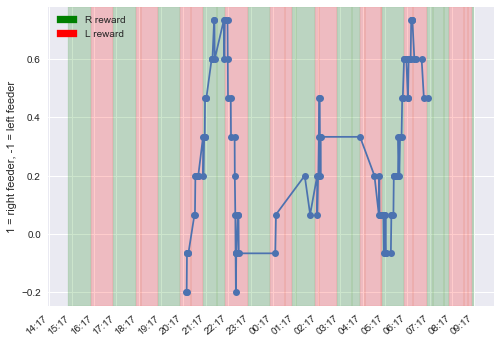

In [180]:
fig = plt.figure(figsize=(10,10))
figtemp, ax = plt.subplots(1, 1)
plt.style.use('seaborn')
choices = plt.plot_date(choices_df_num['time'], choices_df_num['moving avg'], linestyle='solid')
# choices = plt.plot_date(choices_df_num['time'], choices_df_num['moving avg'])

plt.ylabel('1 = right feeder, -1 = left feeder')
# Set time format and the interval of ticks (every 15 minutes)
xformatter = md.DateFormatter('%H:%M')
xlocator = md.MinuteLocator(interval = 60)
# Set xtick labels to appear every 60 minutes
ax.xaxis.set_major_locator(xlocator)
## Format xtick labels as HH:MM
plt.gcf().axes[0].xaxis.set_major_formatter(xformatter)
# rotate_labels...
for label in ax.get_xticklabels():
    label.set_rotation(40)
    label.set_horizontalalignment('right')

cond_dict = { 'unknown': 'y', 'R reward': 'g', 'L reward': 'r'}
for min_time,max_time in condition_start_end:
    cond = df_min.loc[min_time]['condition']
    plt.axvspan(min_time, max_time, alpha=0.2, color=cond_dict[cond])
# act_label = ax.legend(['Right feeder activity'])
# ax = plt.gca().add_artist(act_label)
g_patch = mpatches.Patch(color='g', label='R reward')
r_patch = mpatches.Patch(color='r', label='L reward')
plt.legend(handles=[g_patch,r_patch], loc='upper left')

In [163]:
# choices_grouped = choices_df_num.groupby(pd.Grouper(freq='15Min', base=8, label='right'))['feeder'].value_counts()

TypeError: Only valid with DatetimeIndex, TimedeltaIndex or PeriodIndex, but got an instance of 'RangeIndex'

In [97]:
df_test = pd.DataFrame({'B': [0, 1, 2, np.nan, 4]},
                 index = [pd.Timestamp('20130101 09:00:00'),
                           pd.Timestamp('20130101 09:00:02'),
                           pd.Timestamp('20130101 09:00:03'),
                           pd.Timestamp('20130101 09:00:05'),
                           pd.Timestamp('20130101 09:00:06')])

In [98]:
df_test.rolling('2s', min_periods=1).sum()

,B
2013-01-01 09:00:00,0.0
2013-01-01 09:00:02,1.0
2013-01-01 09:00:03,3.0
2013-01-01 09:00:05,NaN
2013-01-01 09:00:06,4.0
